In [21]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg' # For mac users with Retina display

import os, sys
import numpy as np
import pylab as pl

sys.path.append('../src/')
from utils import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Figure 1

In [46]:
y = 0.15
z = 0
nus = np.logspace(-1,3)# GHz
I_CMB = B_nu(nus)
I_R = T2I(T_R(nus, z=z), nus)
dI_tSZ = B_nu(nus) * dI_I_tSZ(nus, y)
dI_R = T2I(T_R(nus, z=z), nus)

Text(0, 0.5, '$I_{\\nu}$ [MJy/sr]')

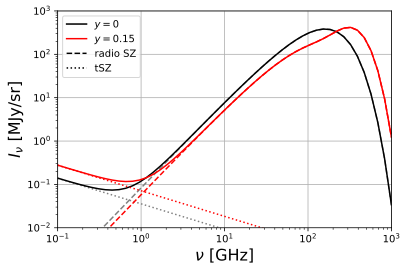

In [47]:
pl.loglog(nus, I_CMB, c='grey', ls='--')
pl.loglog(nus, I_R  , c='grey', ls=':')
pl.loglog(nus, I_CMB + I_R, c='k')
pl.loglog(nus, dI_tSZ+I_CMB, 'r--')
pl.loglog(nus, dI_R+I_R, 'r:')
pl.loglog(nus, (I_R+I_R)+(dI_tSZ+I_CMB), 'r-')
pl.plot(-1,-1,'k-', label=r'$y=0$')
pl.plot(-1,-1,'r-', label=r'$y=0.15$')
pl.plot(-1,-1,'k--', label='radio SZ')
pl.plot(-1,-1,'k:', label=r'tSZ')
pl.xlim(1e-1,1e3)
pl.ylim(1e-2,1e3)
pl.grid()
pl.legend()
pl.xlabel(r'$\nu$ [GHz]', size=16)
pl.ylabel(r'$I_{\nu}$ [MJy/sr]', size=16)

## Figure 2

In [64]:
y = 1e-4
z = 0 
tau = 1e-2
beta = 1e-3
nus = np.linspace(0.4,5,1000) # GHz
dT_tSZ = dT_T_tSZ(y)*2.725e3
dT_R = dT_T_R(y)*T_R(nus, z=z)*1e3


Text(0, 0.5, '$\\Delta T$ [mK]')

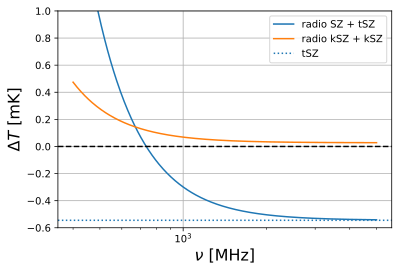

In [71]:
pl.plot(nus*1e3, dT_SZ(nus, y=y, z=z)*1e3, label='radio SZ + tSZ')
pl.semilogx(nus*1e3, dT_kSZ(nus, tau=tau, beta=beta, z=z)*1e3, label='radio kSZ + kSZ')
# pl.semilogx(nus, dT_R)
pl.axhline(dT_tSZ, ls=':', label='tSZ')
pl.axhline(ls='--', c='k')
pl.ylim(-0.6,1)
pl.grid()
pl.legend()
pl.xlabel(r'$\nu$ [MHz]', size=16)
pl.ylabel(r'$\Delta T$ [mK]', size=16)